# Ordinary Least Squares

In [270]:
%matplotlib inline

In [271]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


## OLS estimation

>> 自己模拟一套数据



In [272]:
np.random.seed(999)

nsample = 100
# 0 - 10 拆成100份 一个数组(numpy包的)
x = np.linspace(0, 10, 100,endpoint=False)

# 一个[100,2]的矩阵
X = np.column_stack((x, x ** 2))
#创建一个一维数组，里面有3个参数

beta = np.array([1, 
                0.1, 
                10])
# 按照正态分布生成100个数
e = np.random.normal(size=nsample)

print(beta)

[ 1.   0.1 10. ]


Our model needs an intercept so we add a column of 1s:

>> 增加一个常数项

In [273]:
# add_constant： 给传入的参数增加一个column，全是1，现在是[100,3]了
X = sm.add_constant(X)
print(X)

# X = [100,3], beta = [3,1] -- > 然后就是[100,1] 和 e矩阵一样
# 这里本来beta是1维数字，但是dot把它转换为[3,1] 了

"""

If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

"""
y = np.dot(X, beta) + e

print(y)

[[1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e-01 1.000e-02]
 [1.000e+00 2.000e-01 4.000e-02]
 [1.000e+00 3.000e-01 9.000e-02]
 [1.000e+00 4.000e-01 1.600e-01]
 [1.000e+00 5.000e-01 2.500e-01]
 [1.000e+00 6.000e-01 3.600e-01]
 [1.000e+00 7.000e-01 4.900e-01]
 [1.000e+00 8.000e-01 6.400e-01]
 [1.000e+00 9.000e-01 8.100e-01]
 [1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.100e+00 1.210e+00]
 [1.000e+00 1.200e+00 1.440e+00]
 [1.000e+00 1.300e+00 1.690e+00]
 [1.000e+00 1.400e+00 1.960e+00]
 [1.000e+00 1.500e+00 2.250e+00]
 [1.000e+00 1.600e+00 2.560e+00]
 [1.000e+00 1.700e+00 2.890e+00]
 [1.000e+00 1.800e+00 3.240e+00]
 [1.000e+00 1.900e+00 3.610e+00]
 [1.000e+00 2.000e+00 4.000e+00]
 [1.000e+00 2.100e+00 4.410e+00]
 [1.000e+00 2.200e+00 4.840e+00]
 [1.000e+00 2.300e+00 5.290e+00]
 [1.000e+00 2.400e+00 5.760e+00]
 [1.000e+00 2.500e+00 6.250e+00]
 [1.000e+00 2.600e+00 6.760e+00]
 [1.000e+00 2.700e+00 7.290e+00]
 [1.000e+00 2.800e+00 7.840e+00]
 [1.000e+00 2.900e+00 8.410e+00]
 [1.000e+0

>> 然后跑回归

In [274]:
#从help文件里面还可以看到 GLS, GLSAR, OLS, WLS
model = sm.OLS(y, X)

# 然后把拟合的结果放到results里面输出。
results = model.fit()
#然后输出
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.568e+06
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          5.75e-242
Time:                        20:39:41   Log-Likelihood:                -138.18
No. Observations:                 100   AIC:                             282.4
Df Residuals:                      97   BIC:                             290.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9252      0.288      3.216      0.0

输入 ``dir(results)`` 可以查看完整的列表

In [275]:
dir(results)
print("T-test of x1:",results.tvalues[1])
print("P value of x1:",results.pvalues[1])
print("Parameters: ", results.params)
print("R2: ", results.rsquared)
print("Model: ", results.model)

T-test of x1: 1.349966467778931
P value of x1: 0.1801685406192523
Parameters:  [0.92519245 0.18132402 9.99579298]
R2:  0.9999893838840417
Model:  <statsmodels.regression.linear_model.OLS object at 0x1139d4aa0>


## OLS non-linear curve but linear in parameters
We simulate artificial data with a non-linear relationship between x and y:

In [276]:
nsample = 50

sig = 0.5
# 0-20分成nsample份

x = np.linspace(0, 20, nsample)
# 3维数组生成X

# 第一个就是x， 第二个是sin(x),第三个二次函数，第四个添加一串1，相当于上面的add_constant(X)。 也就是[50,4]的matrix
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))

# 一个[4,1]的matrix
beta = [0.5, 
        0.5, 
        -0.02, 
        5.0]

#乘出来一个 [50,1]的matrix
y_true = np.dot(X, beta)

# 再给y加一个随机数
y = y_true + sig * np.random.normal(size=nsample)

Fit and summary:

In [277]:
#保存回归结果
res = sm.OLS(y, X).fit()
#输出
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     191.6
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.38e-26
Time:                        20:39:41   Log-Likelihood:                -38.833
No. Observations:                  50   AIC:                             85.67
Df Residuals:                      46   BIC:                             93.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5150      0.029     17.861      0.0

Extract other quantities of interest:

In [278]:
print("Beta parameters: ", res.params)

print("Beta parameters: ", res.params[0])

print("Standard errors: ", res.bse)

print("Predicted values: ", res.predict())

Beta parameters:  [ 0.51496189  0.46666026 -0.02147469  4.94765928]
Beta parameters:  0.5149618937720726
Standard errors:  [0.02883208 0.11334228 0.00253148 0.18694827]
Predicted values:  [ 4.41079209  4.8902835   5.33218712  5.71107036  6.01067913  6.22660832
  6.36702557  6.4513293   6.50696166  6.56489983  6.65456655  6.7989961
  7.01104975  7.29130276  7.62794985  7.99874473  8.37465519  8.7246329
  9.02071466  9.24261663  9.3810669   9.43932885  9.432665    9.38582941
  9.32900064  9.29282352  9.3033743   9.37787636  9.52187049  9.72830455
  9.97869209 10.24614965 10.49981363 10.70991109 10.85265136 10.91413477
 10.89263633 10.79888917 10.65432108 10.48753399 10.32960477 10.20897938
 10.14679928 10.15342795 10.22674819 10.35250997 10.5066717  10.65935015
 10.77973021 10.84112772]


Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the ``wls_prediction_std`` command.

>> - fig（Figure）：是整个图形的容器，相当于一个大的外框。它包含所有的子图、标题、图例等。fig 对象管理图形的整体布局和显示。
>> - ax（Axes）：这是图形中的一个子区域，可以在其中绘制数据。ax 是 Axes 对象，表示图形中的一个子图或绘图区域。每个 Axes 对象都有自己的坐标系和标记，可以包含多条曲线、标题、标签、网格等。

>> - 可以参考stata画图，option里面的代码也是一行一行加的

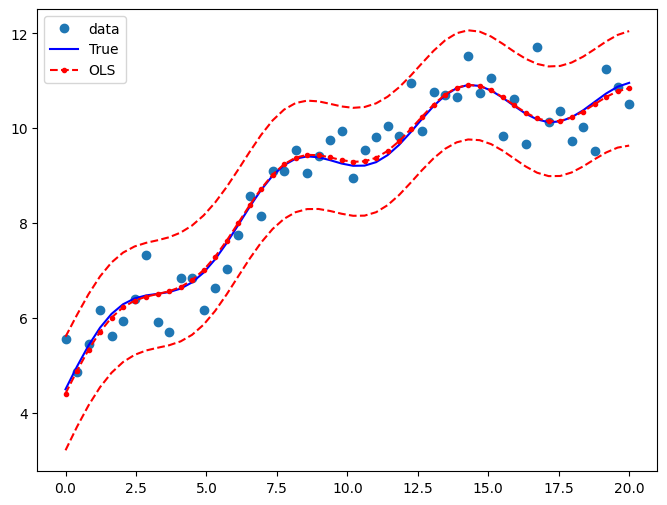

In [279]:
# 用dir(results)可以查看到有get_prediction

# 把预测的值保存到pred_ols这个数组里
pred_ols = res.get_prediction()

#可以打印出来看一下有什么东西

# print(pred_ols.summary_frame())


# 生成上下限，对 summary_frame 返回的数据框进行列选择，选择上下限
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

# 创建图形框和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 把数据点画出来
ax.plot(x, y, "o", label="data")

# y_true就是没有加随机项的那条线
ax.plot(x, y_true, "b-", label="True")
# 拟合出来的线
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
# "r+" 表示使用红色+++绘制
ax.plot(x, iv_u, "r--")
# 这个就是蓝色的点
ax.plot(x, iv_l, "r--")
# 自动选一个最好的location放置
ax.legend(loc="best")

## OLS with dummy variables

We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [280]:
nsample = 50
# 生成全是0的[50,1]matrix
groups = np.zeros(nsample, int)
# print(groups)
groups[20:40] = 1
# print(groups)
groups[40:] = 2
# print(groups)
#这个因为只有[0,1,2]三个变量，就转换为3个分类变量[T,F,F]分别代表第几个是不是[0,1,2],类似于stata 里 i.birhprovince这样。
dummy = pd.get_dummies(groups).values
# print(dummy)

# 0 - 20 分成sample份
x = np.linspace(0, 20, nsample)
print(x)
# drop reference category
# 从 dummy 矩阵中取出所有行，以及从第二列到最后一列的所有列，不要第一列，要不然共线了
X = np.column_stack((x, dummy[:, 1:]))
# 取小x拼成第一个column，取大X（2，3列）拼成第二个column
print(X)
# 看说明可以知道prepend是放第一列还是最后一列
X = sm.add_constant(X, prepend=False)
print('这个是大X\n',X)

# 设置4个参数，上面是[50,4],这里是[4,1]，乘出来[50,1]
# 每一行obs都按照这个加权
beta = [1.0, 3, -3, 10]

y_true = np.dot(X, beta)
print(y_true)
# 按照正态分布生成一个数
e = np.random.normal(size=nsample)
# error term
y = y_true + e
print('这个是y\n',y)
print('这个是y_true\n',y_true)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[[ 0.          0.          0.        ]
 [ 0.40816327  0.          0.        ]
 [ 0.81632653  0.          0.        ]
 [ 1.2244898   0.          0.        ]
 [ 1.63265306  0.          0.        ]
 [ 2.04081633  0.          0.        ]
 [ 2.44897959  0.          0.        ]
 [ 2.85714286  0.          0.        ]
 [ 3.26530612  0.          0.        ]
 [ 3.67346939  0.          0.        ]
 

Inspect the data:

In [281]:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[11.34203593  9.67574279 10.61756197 11.30430089 11.85901436]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


Fit and summary:

In [282]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     945.5
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.55e-41
Time:                        20:39:41   Log-Likelihood:                -57.783
No. Observations:                  50   AIC:                             123.6
Df Residuals:                      46   BIC:                             131.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0330      0.052     19.776      0.0

Draw a plot to compare the true relationship to OLS predictions:

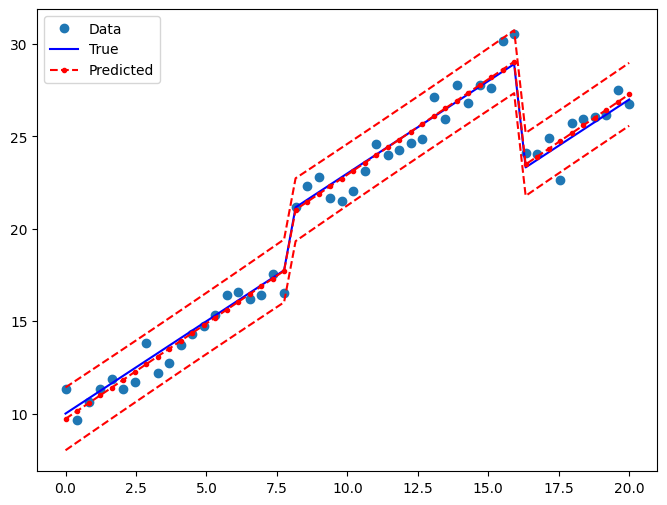

In [283]:
# 和上面一样返回预测值画图即可
pred_ols2 = res2.get_prediction()
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")

## Joint hypothesis test

### F test

We want to test the hypothesis that both coefficients on the dummy variables are equal to zero, that is, $R \times \beta = 0$. An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups:

In [284]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
# 三个分类变量的截距相同？
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=185.001206542376, p=1.0097772517947781e-22, df_denom=46, df_num=2>


You can also use formula-like syntax to test hypotheses

In [285]:
# 给f_test函数传入参数,如果不知道函数怎么用，就使用help(res2.f_test)
# 或者去它的上一级看看有什么可以检验的
# help(res2)
# help(res2.f_test)
print(res2.f_test("x2 = x3 = 0"))

<F test: F=185.00120654237546, p=1.0097772517948364e-22, df_denom=46, df_num=2>


### Small group effects

If we generate artificial data with smaller group effects, the T test can no longer reject the Null hypothesis: 

In [286]:
# 把第三个参数的权重设置为0了
beta = [1.0, 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     649.6
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.21e-37
Time:                        20:39:42   Log-Likelihood:                -67.831
No. Observations:                  50   AIC:                             143.7
Df Residuals:                      46   BIC:                             151.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8596      0.064     13.461      0.0

In [287]:
print(res3.f_test(R))

<F test: F=4.9604360133759275, p=0.011200299091192594, df_denom=46, df_num=2>


In [288]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=4.960436013375931, p=0.011200299091192524, df_denom=46, df_num=2>


### Multicollinearity

The Longley dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification. 

In [289]:
from statsmodels.datasets.longley import load_pandas

y = load_pandas().endog
X = load_pandas().exog
print(X)
X = sm.add_constant(X,prepend=False)

    GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0      83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1      88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2      88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3      89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4      96.2  328975.0  2099.0  3099.0  112075.0  1951.0
5      98.1  346999.0  1932.0  3594.0  113270.0  1952.0
6      99.0  365385.0  1870.0  3547.0  115094.0  1953.0
7     100.0  363112.0  3578.0  3350.0  116219.0  1954.0
8     101.2  397469.0  2904.0  3048.0  117388.0  1955.0
9     104.6  419180.0  2822.0  2857.0  118734.0  1956.0
10    108.4  442769.0  2936.0  2798.0  120445.0  1957.0
11    110.8  444546.0  4681.0  2637.0  121950.0  1958.0
12    112.6  482704.0  3813.0  2552.0  123366.0  1959.0
13    114.2  502601.0  3931.0  2514.0  125368.0  1960.0
14    115.7  518173.0  4806.0  2572.0  127852.0  1961.0
15    116.9  554894.0  4007.0  2827.0  130081.0  1962.0


Fit and summary:

In [290]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           4.98e-10
Time:                        20:39:42   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GNPDEFL       15.0619     84.915      0.177      0.8

/Users/ynbsztl/opt/anaconda3/envs/Python_tutorial/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### Condition number

One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome (see Greene 4.9). The first step is to normalize the independent variables to have unit length: 

>> 把x都正态化

In [291]:
# 重新命名一个变量 取自大X里面的值，而不是变量
norm_x = X.values
# print(norm_x)
# 打印的是这个枚举对象的内存地址（并不实际打印列的索引和值）。
# print(enumerate(X))

for i, name in enumerate(X):
    if name == "const":
        # 当前列名是 "const"，则跳过此列的处理
        continue
    # 将每一列的数据除以该列的欧几里得范数，标准化的目的是使每列数据的范数为 1
    # 单独对i这一列进行处理（同一个变量）
    norm_x[:, i] = X[name] / np.linalg.norm(X[name])
# 标准化后的转置和本身相乘
norm_xtx = np.dot(norm_x.T, norm_x)

# print(norm_xtx)

>> 取最大特征值与最小特征值之比的平方根。

In [292]:
# 计算出特征值
eigs = np.linalg.eigvals(norm_xtx)
# 最大特征值与最小特征值之比的平方根
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.869960622986


#### Dropping an observation

Greene also points out that dropping a single observation can have a dramatic effect on the coefficient estimates: 

In [293]:
# 分别取y和x的前 14 个观测值
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()

print(
    # 字符串模板。%4.2f 表示格式化为宽度为4，小数点后2位的浮点数
    "Percentage change %4.2f%%\n"
    # 输出7次
    * 7
    # 将列表转换为元组， 然后填充到字符串模板中
    % tuple(
        [
            i
            for i in (ols_results2.params - ols_results.params) # 计算原回归结果的参数差
            / ols_results.params ## 计算差值与原始参数的比值。
            * 100 # 转换为百分比
        ]
    )
)

Percentage change -105.20%
Percentage change -3.43%
Percentage change 2.92%
Percentage change 3.32%
Percentage change 97.06%
Percentage change 4.64%
Percentage change 4.55%



We can also look at formal statistics for this such as the DFBETAS -- a standardized measure of how much each coefficient changes when that observation is left out.

In [294]:
# 衡量某个观测值对每个回归系数的影响
infl = ols_results.get_influence()

In general we may consider DBETAS in absolute value greater than $2/\sqrt{N}$ to be influential observations

In [295]:
2.0 / len(X) ** 0.5

0.5

In [296]:
# summary_frame 返回一个统计表
# 使用正则表达式，任何列名中包含 "dfb" 字符串的列都会被选中。
print(infl.summary_frame().filter(regex="dfb"))


    dfb_GNPDEFL   dfb_GNP  dfb_UNEMP  dfb_ARMED   dfb_POP  dfb_YEAR  dfb_const
0     -0.234566 -0.045095  -0.121513  -0.149026  0.211057  0.013388  -0.016406
1     -0.289091  0.124453   0.156964   0.287700 -0.161890  0.025958  -0.020608
2      0.007161 -0.016799   0.009575   0.002227  0.014871  0.008103  -0.008382
3      0.907968 -0.500022  -0.495996   0.089996  0.711142 -0.040056   0.018093
4     -0.219351  1.611418   1.561520   1.169337 -1.081513 -1.864186   1.871260
5     -0.077045 -0.198129  -0.192961  -0.430626  0.079916  0.323275  -0.321373
6     -0.241983  0.438146   0.471797  -0.019546 -0.448515 -0.307517   0.315945
7     -0.002742  0.018591   0.005064  -0.031320 -0.015823 -0.015583   0.015816
8     -0.045687  0.023708   0.018125   0.013683 -0.034770  0.005116  -0.004019
9     -0.282131 -0.412621  -0.663904  -0.715020 -0.229501  1.035723  -1.018242
10    -0.024781  0.029480   0.035361   0.034508 -0.014194 -0.030805   0.030947
11    -0.079727  0.030276  -0.008883  -0.006854 -0.0